In [49]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [50]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

### Definição de funções úteis

In [51]:
def calculateErrorSurface(y, x1, x2):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameters.
    N = 200
    a1 = np.linspace(-22.0, 24.0, N)
    a2 = np.linspace(-22.0, 24.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):

        for iter2 in range(0, N):

            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2

            J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat))

    return J, A1, A2

def calculateClosedFormSolution(X, y):
    """
    Calculate closed-form solution using the normal equation.
    """
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/M)*np.sum(np.power((y - yhat), 2))
    
    return Joptimum, a_opt

def batchGradientDescent(alpha, maxNumIter, X, y):
    """
    Batch gradient descent solution.
    """
    # Initialize error history with zeros.
    Jgd = np.zeros(maxNumIter+1)
    # Random initialization of parameters.
    a = np.array([-20.0, -20.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, maxNumIter+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)
    
    yhat = X.dot(a)
    Jgd[0] = (1.0/M)*np.sum(np.power(y - yhat, 2))

    # Batch gradient-descent loop.
    error = 1
    iteration = 0
    while(error > 0.001 and iteration < maxNumIter-1):
        
        h = X.dot(a)
        
        gradients = -(2.0/M)*X.T.dot(y - h)
        
        a = a - alpha * gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        
        yhat = X.dot(a)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - yhat), 2))
        
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
    
        iteration += 1        
        
    return a, a_hist, Jgd, iteration

### Geração do conjunto de dados

In [52]:
# Number of pairs feature/label.
M = 10000

# Input values (features)
x1 = 10.0*np.random.randn(M, 1)

x2 = 10.0*np.random.randn(M, 1)

# True function/model.
y = 2.0*x1 + 2.0*x2

# Output values (targets).
y_noisy = y + 10.0*np.random.randn(M, 1)

### Visualizando o conjunto de dados

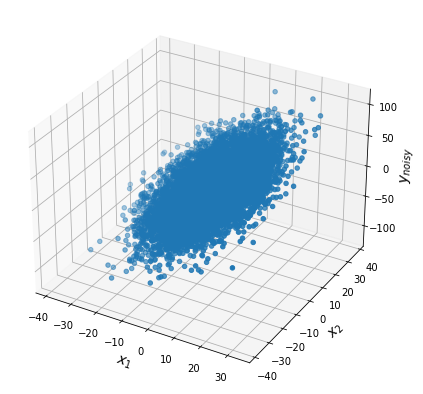

In [53]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y_{noisy}$', fontsize=14)
plt.show()

### Plotando a superfície de erro

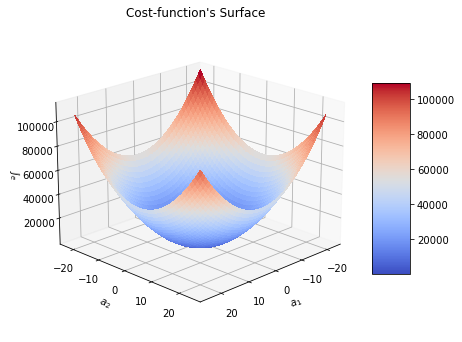

In [54]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');

plt.title('Cost-function\'s Surface')

ax.view_init(20, 45)

#Show the plot.
plt.show()

### Encontrando o ponto de mínimo com a equação normal

In [55]:
# Calculate closed-form solution.
X = np.block([x1,x2])

Joptimum, a_opt = calculateClosedFormSolution(X, y_noisy)

print('a1:', a_opt[0][0])
print('a2:', a_opt[1][0])
print('Joptimum:', Joptimum)

a1: 2.0032994113858904
a2: 1.9999704951023065
Joptimum: 99.5225680139118


### Encontrando o ponto de mínimo com o gradiente descendente

In [56]:
# Gradient-descent solution.
maxNumIter = 10000

alpha = 0.004 # Valor empírico "ótimo".
#alpha = 0.0001 # Valor muito pequeno: convergência lenta (alto número de iterações).
#alpha = 0.007 # Valor muito grande:algortimo não converge.

# Run batch gradient-descent algorithm.
a, a_hist, Jgd, iteration = batchGradientDescent(alpha, maxNumIter, X, y_noisy)

### Plotando a superfície de contorno com o histórico de atualizações dos pesos

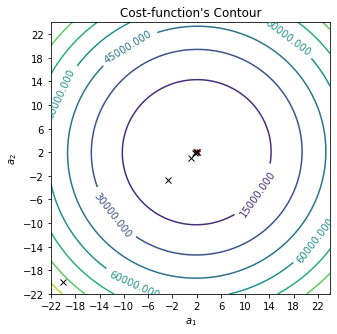

In [57]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')

plt.xticks(np.arange(-22, 24, step=4.0))
plt.yticks(np.arange(-22, 24, step=4.0))
plt.show()

### Gráfico com número de iterações versus o erro

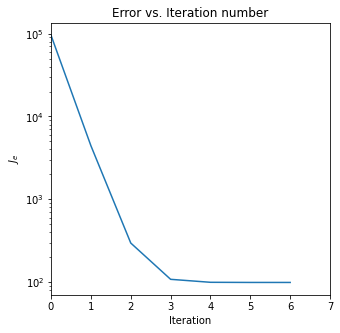

In [58]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()